In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'absences'}>]], dtype=object)

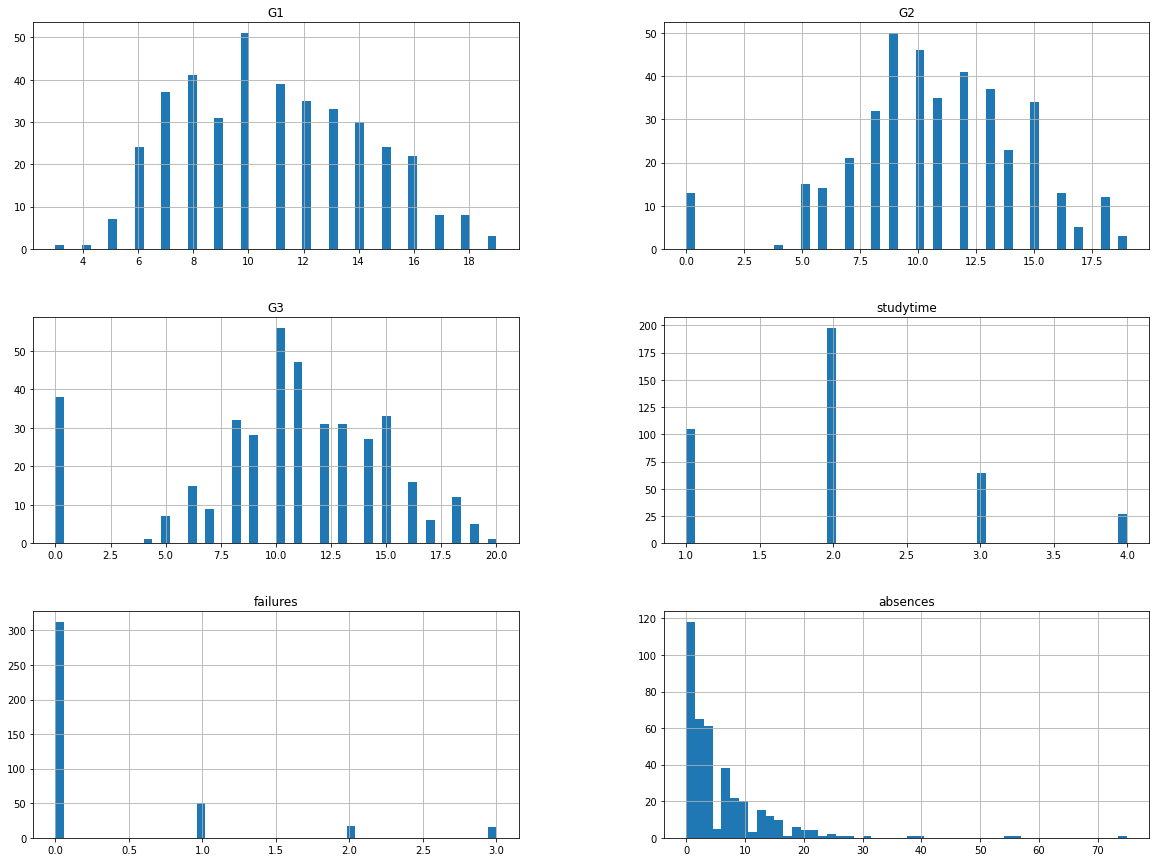

In [19]:
data = pd.read_csv("Datasets/student/student-mat.csv", sep=";")

# only use certain features
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

data.hist(bins=50, figsize=(20,15))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

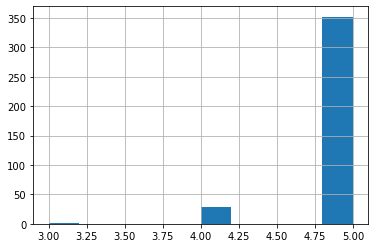

In [36]:
# train and test datasets
from sklearn.model_selection import StratifiedShuffleSplit

data["G2_cat"] = pd.cut(data["G2"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])

data["G2_cat"].hist()
data.reset_index()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(data, data["G2_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

<AxesSubplot:xlabel='G2', ylabel='G3'>

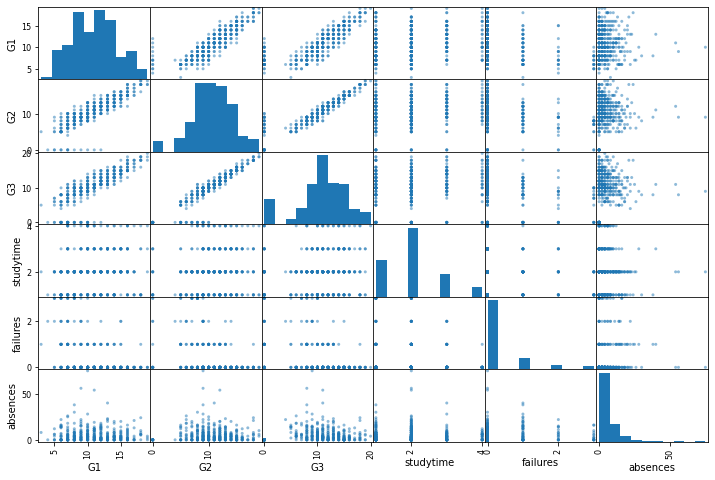

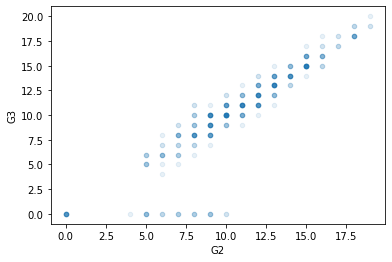

In [14]:
# Data visualizing
from pandas.plotting import scatter_matrix

corr_matrix = data.corr()
corr_matrix

attributes = ["G1", "G2", "G3", "studytime", "failures", "absences"]
scatter_matrix(data[attributes], figsize=(12,8))

data.plot(kind="scatter", x="G2", y="G3", alpha=0.1)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_scale_pipeline = Pipeline([
    ("num_scale", StandardScaler())
])

data_tr = num_scale_pipeline.fit_transform(data)

data_tr

array([[-1.78246688, -1.25479105, -0.96493392, -0.04228585, -0.44994364,
         0.03642446],
       [-1.78246688, -1.52097927, -0.96493392, -0.04228585, -0.44994364,
        -0.21379577],
       [-1.1791469 , -0.72241461, -0.0907392 , -0.04228585,  3.58932316,
         0.53686493],
       ...,
       [-0.27416693, -0.72241461, -0.74638524, -1.23535078,  3.58932316,
        -0.33890588],
       [ 0.02749306,  0.34233827, -0.0907392 , -1.23535078, -0.44994364,
        -0.71423623],
       [-0.87748691, -0.45622639, -0.30928788, -1.23535078, -0.44994364,
        -0.08868565]])